In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
df


,Date,Price,Open,High,Low,Vol.,Change %
0,1/2/2018,51.02,51.38,51.40,50.78,8.46M,0.12%
1,1/3/2018,51.62,52.54,52.56,51.42,9.92M,1.18%
2,1/4/2018,51.08,52.12,52.18,50.64,11.64M,-1.05%
3,1/5/2018,52.12,51.30,52.12,51.20,9.33M,2.04%
4,1/8/2018,52.02,52.40,52.52,51.50,8.36M,-0.19%
...,...,...,...,...,...,...,...
1456,12/4/2023,72.60,72.70,72.90,72.50,0.55K,0.83%
1457,12/5/2023,71.20,72.30,72.40,71.20,0.45K,-1.93%
1458,12/6/2023,71.70,71.90,72.10,71.60,0.25K,0.70%
1459,12/7/2023,71.50,71.80,71.90,71.10,0.06K,-0.28%


In [3]:
# 2.  chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [4]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.001}
Best score: 0.2681675657706123


In [5]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([65.80556891, 65.30599753, 65.00611541, 64.60610543, 64.10582241,
       64.10582241, 65.40593473, 65.40593473, 65.70567729, 67.90110391,
       68.49928707, 68.20021278, 68.20021278, 69.49609266, 69.89483397,
       71.78994054, 71.98958627, 71.09145686, 71.69013148, 72.18926993,
       71.09145686, 70.39333422, 71.78994054, 71.88975874, 71.69013148,
       71.69013148, 71.78994054, 71.3907571 , 71.1912158 , 70.89196092,
       70.69249218, 70.99170533, 71.69013148, 71.98958627, 72.08942328,
       72.18926993, 72.88847402, 72.18926993, 72.68865131, 73.08833679,
       72.78855764, 71.78994054, 70.89196092, 69.89483397, 70.99170533,
       71.49053999, 72.08942328, 72.88847402, 72.98840043, 72.98840043,
       72.18926993, 70.99170533, 69.89483397, 70.29362554, 69.99452616,
       70.09422188, 71.1912158 , 71.88975874, 70.49304799, 70.69249218,
       70.49304799, 69.69545864, 68.59897268, 68.69865606, 68.59897268,
       68.99769696, 68.00081137, 68.29990753, 67.40248405, 66.60

In [6]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[72.6]])

In [7]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([72.08942328]),
 array([71.57977631]),
 array([71.07128283]),
 array([70.56413007]),
 array([70.05846067]),
 array([69.55436722]),
 array([69.05188949]),
 array([68.55101373]),
 array([68.05167405]),
 array([67.55375543]),
 array([67.05709801]),
 array([66.56150249]),
 array([66.06673635]),
 array([65.57254065]),
 array([65.07863733]),
 array([64.58473682]),
 array([64.09054589]),
 array([63.59577574]),
 array([63.10015021]),
 array([62.60341407]),
 array([62.10534136]),
 array([61.60574377]),
 array([61.10447881]),
 array([60.60145776]),
 array([60.09665323]),
 array([59.59010593]),
 array([59.08193065]),
 array([58.57232087]),
 array([58.06155186]),
 array([57.54998182])]

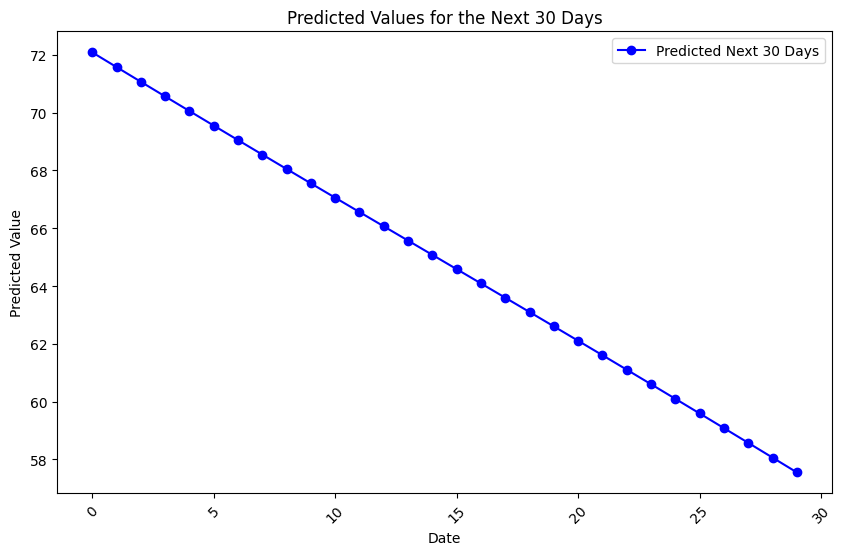

In [8]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [9]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [10]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.45000718782770216
Testing MAPE: 0.005196189852831736
Testing MAE: 0.3627929074441871


In [11]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.45000718782770216
Testing MAPE: 0.005196189852831736
Testing MAE: 0.3627929074441871


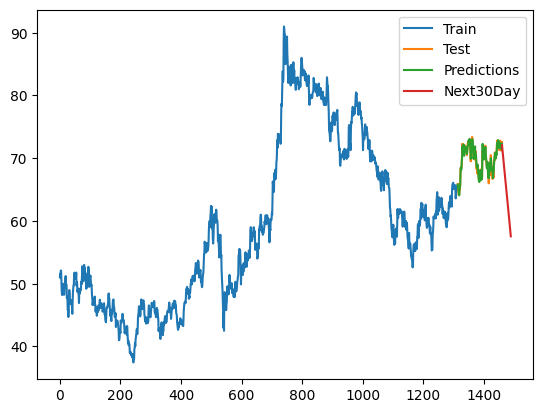

In [12]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()